In [48]:
from comut import comut
from comut import fileparsers
import palettable
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stat
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from statsmodels.stats import multitest
import sys
plt.rcParams["font.family"] = "arial"

In [2]:
balance_6 = palettable.cmocean.diverging.Balance_6.mpl_colors
safe_10 = palettable.cartocolors.qualitative.Safe_10.mpl_colors
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
purp_7 = palettable.cartocolors.sequential.Purp_7.mpl_colormap

In [3]:
gene_list = ['PIK3CA', 'ESR1',  'TP53','KRAS','KMT2C']

## Figure 2b

In [27]:
pats_sig_genes_for_plot_less_col = pd.read_csv('pats_sig_genes_for_plot.tsv',sep='\t')
on_patients_mut_data = pd.read_csv('on_pats_subset_sig_genes_mut_sig.tsv',sep='\t')
patients_colors = pd.read_csv('patient_color_for_pats.tsv',sep='\t')

In [28]:
pats_sig_genes_for_plot_less_col

,category,log10qvalue
0,PIK3CA,6.904317
1,ESR1,4.619733
2,TP53,1.379903
3,KRAS,1.170607
4,KMT2C,0.000000


In [29]:
by_pats_comut = comut.CoMut()

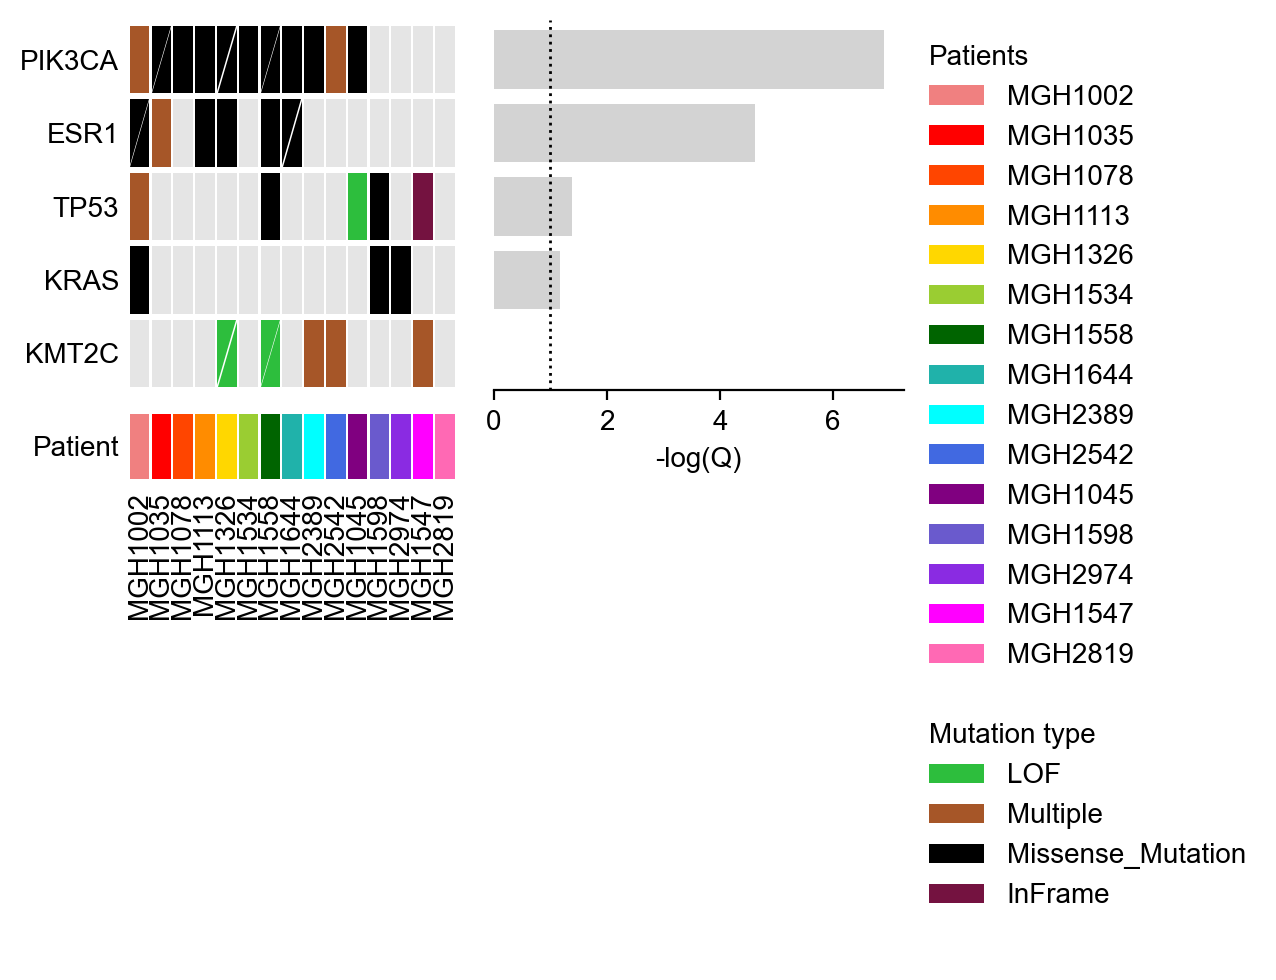

In [30]:
plt.rcParams['svg.fonttype'] = 'none'
mut_mapping_no_color = {'mutation': 'black', np.nan: '#FFFFFF',
              'Absent': {'facecolor': 'grey', 'alpha': 0.2}}

mut_mapping_LOF_color = {'Missense_Mutation': 'black', 'LOF': '#2DBE3D','InFrame': '#741240',
                         np.nan: '#FFFFFF',
              'Absent': {'facecolor': 'grey', 'alpha': 0.2}}

patient_mapping_color = {'MGH1002':'lightcoral',
'MGH1035':'red',
'MGH1078':'orangered',
'MGH1113':'darkorange',
'MGH1326':'gold',
'MGH1534':'yellowgreen',
'MGH1558':'darkgreen',
'MGH1644':'lightseagreen',
'MGH2389':'aqua',
'MGH2542':'royalblue',
'MGH1598':'slateblue',
'MGH2974':'blueviolet',
'MGH1045':'purple',
'MGH1547':'fuchsia',
'MGH2819':'hotpink'}


by_pats_comut.add_categorical_data(on_patients_mut_data, name = 'Mutation type',
                                     category_order=['KMT2C','KRAS','TP53','ESR1','PIK3CA'],
                                       mapping=mut_mapping_LOF_color)

by_pats_comut.add_categorical_data(patients_colors, name = 'Patients',
                                       mapping=patient_mapping_color)

# create mapping for side bar data, make the bars thinner with bar_kwargs
side_mapping = {'log10qvalue': 'darkgrey'}
bar_kwargs = {'height': 0.8, 'alpha':0.5}



by_pats_comut.add_side_bar_data(pats_sig_genes_for_plot_less_col, paired_name='Mutation type',
                            name = 'Significance',
                            mapping = side_mapping, xlabel = '-log(Q)', position = 'right', bar_kwargs = bar_kwargs)
structure = [['Patients'], ['Mutation type']]
widths = [2,2.5]
by_pats_comut.plot_comut(figsize = (5, 3), 
                         x_padding = 0.05, 
                         y_padding = 0.04, 
                         tri_padding = 0.03, 
                         hspace = 0.08, 
                         wspace = 0.1,
                        structure=structure,
                        widths=widths)

by_pats_comut.axes['Significance'].axvline(1, color = 'black', linestyle = 'dotted', linewidth = 1)
by_pats_comut.axes['Significance'].set_yticks([1,2,3,4,5])
#by_pats_comut.axes['Significance'].set_yticklabels(on_pats_qvals[::-1])

#mut_leg = by_pats_comut.add_axis_legend(name = 'Mutation type',title = 'Mutation type', ncol = 1)
by_pats_comut.add_unified_legend()

In [23]:
by_pats_comut.figure.savefig('Fig2B_Patients_MiniComut.svg', 
                             bbox_inches = 'tight', dpi = 300, format='svg')



## Figure 2c

In [44]:
by_subclones_comut = comut.CoMut()

by_subclones_mut_data = pd.read_csv('subclones_subset_from_maf_sig_genes_mut_sig.tsv',sep='\t')
by_subclones_sig_data = pd.read_csv('subclones_sig_genes_for_plot.tsv',sep='\t',index_col=0)
#by_subclones_sig_data = pd.read_csv('/Users/lmartin/Documents/2021/significance_comut_plots/mutsig_sig/subset_tree_subclones_logq.tsv',sep='\t')

patient_color_by_subclones = pd.read_csv('patient_color_by_subclones_with_pats.tsv',sep='\t')
patient_color_by_subclones=patient_color_by_subclones.drop_duplicates(subset='sample')
subclones_qvals = by_subclones_sig_data['log10qvalue'].to_list()

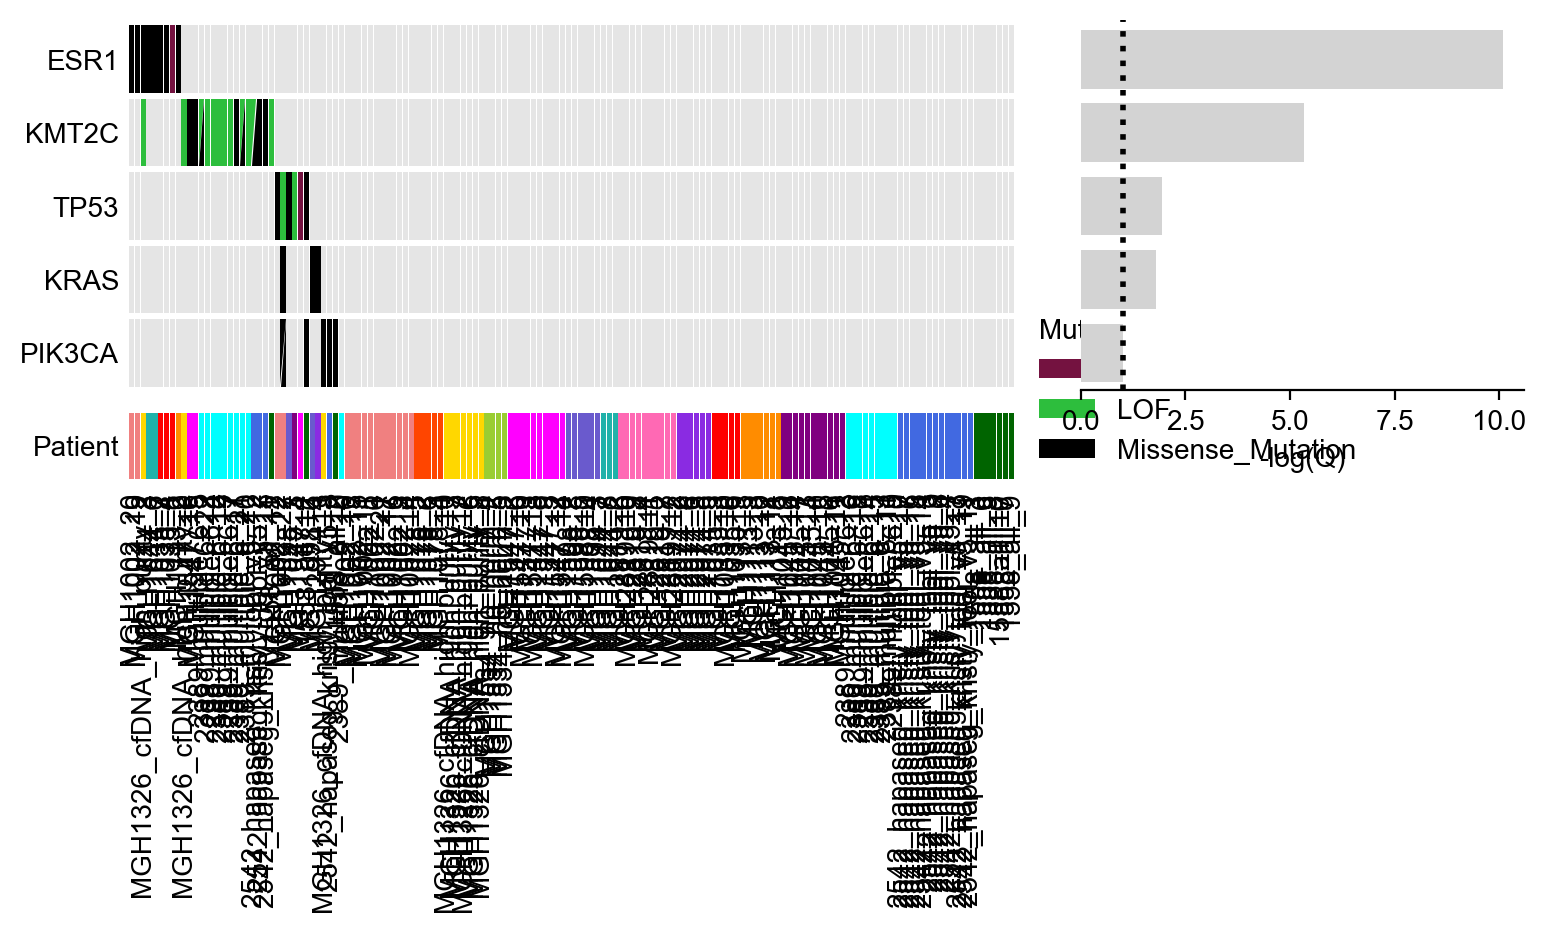

In [45]:
plt.rcParams['svg.fonttype'] = 'none'
mut_mapping_no_color = {'mutation': 'black', np.nan: '#FFFFFF',
              'Absent': {'facecolor': 'grey', 'alpha': 0.2}}

mut_mapping_LOF_color = {'Missense_Mutation': 'black', 'LOF': '#2DBE3D','InFrame': '#741240',
                         np.nan: '#FFFFFF',
              'Absent': {'facecolor': 'grey', 'alpha': 0.2}}

patient_mapping_color = {'MGH1002':'lightcoral',
'MGH1035':'red',
'MGH1078':'orangered',
'MGH1113':'darkorange',
'MGH1326':'gold',
'MGH1534':'yellowgreen',
'MGH1558':'darkgreen',
'MGH1644':'lightseagreen',
'MGH2389':'aqua',
'MGH2542':'royalblue',
'MGH1598':'slateblue',
'MGH2974':'blueviolet',
'MGH1045':'purple',
'MGH1547':'fuchsia',
'MGH2819':'hotpink'}


by_subclones_comut.add_categorical_data(by_subclones_mut_data, name = 'Mutation type',
                                     category_order=['PIK3CA','KRAS','TP53','KMT2C','ESR1'], 
                                        mapping=mut_mapping_LOF_color, )

by_subclones_comut.add_categorical_data(patient_color_by_subclones, name = 'Patients',
                                       mapping=patient_mapping_color)

# create mapping for side bar data, make the bars thinner with bar_kwargs
side_mapping = {'log10qvalue': 'darkgrey'}
bar_kwargs = {'height': 0.8, 'alpha':0.5}
by_subclones_comut.add_side_bar_data(by_subclones_sig_data, paired_name='Mutation type',
                            name = 'Significance',
                            mapping = side_mapping, xlabel = '-log(Q)', position = 'right', bar_kwargs = bar_kwargs)

widths = [2,1]
heights = [0.5,1]
structure = [['Patients'], ['Mutation type']]
by_subclones_comut.plot_comut(figsize = (9, 3), 
                              x_padding = 0.05, y_padding = 0.04, tri_padding = 0.03, 
                              hspace = 0.08, wspace = 0.1,structure=structure,widths=widths,
                             heights=heights)

#by_clones_comut.add_unified_legend(axis_name = 'Significance')
by_subclones_comut.axes['Significance'].axvline(1, color = 'black', linestyle = 'dotted', linewidth = 2)

by_subclones_comut.axes['Significance'].set_yticks([1,2,3,4])
#by_subclones_comut.axes['Significance'].set_yticklabels(subclones_qvals[::-1])

mut_leg = by_subclones_comut.add_axis_legend(name = 'Mutation type',  bbox_to_anchor = (1, 0.26), title = 'Mutation type', ncol = 1)


In [46]:
by_subclones_comut.figure.savefig('Fig2C_Subclones_MiniComut.svg', 
                             bbox_inches = 'tight', dpi = 300, format='svg')


In [40]:
len(by_subclones_mut_data['sample'].unique())

152

## CloneSig barplot

In [58]:
one_sided_subclones_all_genes = pd.read_csv('~/Documents/2025/CloneSig_Test/results/Cb_onesided_subclones_040325_100k.txt',sep='\t')
one_sided_subclones_all_genes.drop(columns=['Cb_exact_p_vals'],inplace=True)
one_sided_subclones_all_genes = one_sided_subclones_all_genes.sort_values(by=['Cb_p_vals'])

_, one_sided_subclones_all_genes["CloneSig_q"], _, _ = multitest.multipletests(one_sided_subclones_all_genes["Cb_p_vals"], method = "fdr_bh")
one_sided_subclones_all_genes['log10q'] = -np.log10(one_sided_subclones_all_genes['CloneSig_q'])

In [63]:
genes_on_fig = ['ESR1','KMT2C','TP53', 'KRAS','PIK3CA']
res_from_fig = one_sided_subclones_all_genes[one_sided_subclones_all_genes['gene'].isin(genes_on_fig)]

In [65]:
res_from_fig

,gene,Cb_p_vals,CloneSig_q,log10q
1,ESR1,0.00001,0.00012,3.920819
2,KMT2C,0.00879,0.03516,1.453951
0,PIK3CA,0.21178,0.42356,0.373085
3,TP53,0.90331,1.00000,-0.000000
4,KRAS,1.00000,1.00000,-0.000000


In [66]:
res_from_fig_ordered = res_from_fig.loc[[1,2,3,4,0]]


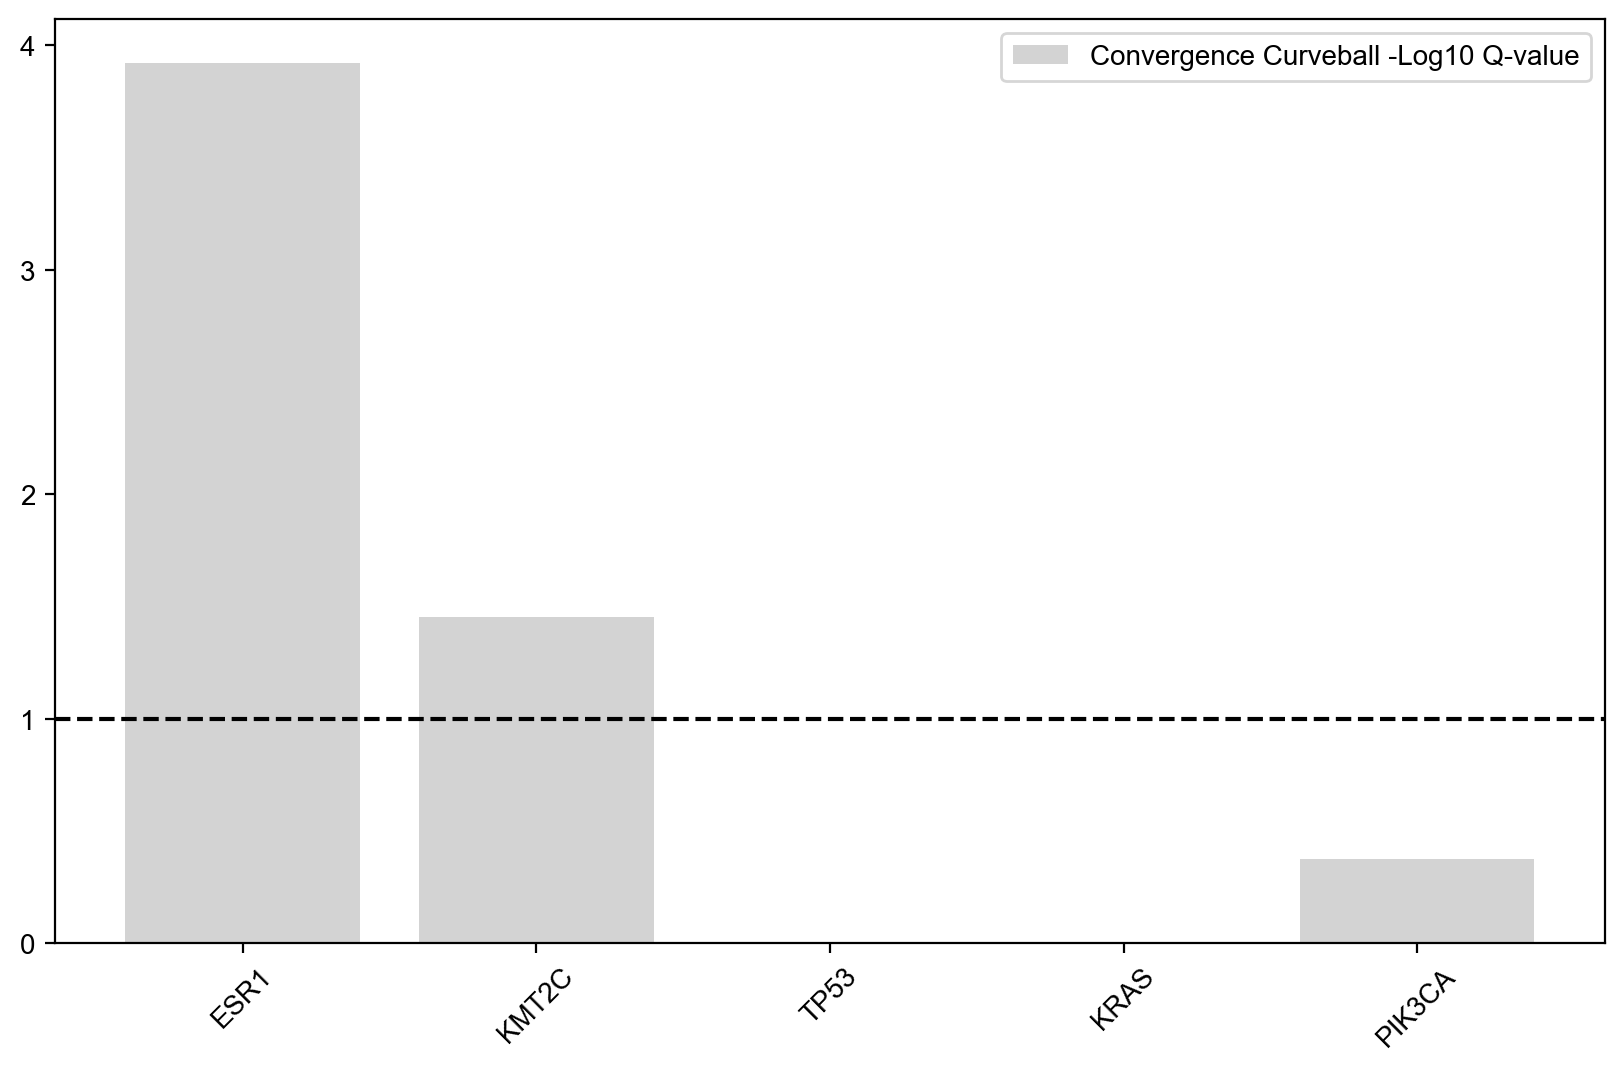

In [67]:
genes = list(res_from_fig_ordered['gene'])
x = np.arange(len(genes))
y=np.arange(0,5)

convergence_q = list(res_from_fig_ordered['log10q'])
#clonal_q = list(combined_p_val_df['clonal_mutsig_logq'])

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x, convergence_q, label='Convergence Curveball -Log10 Q-value',color='lightgray')
plt.axhline(y=1, color='black', linestyle='--') # Dotted line at y=25, red color

ax.set_xticks(x,genes)
ax.set_yticks(y)
ax.legend()
plt.xticks(rotation=45)
plt.savefig('Fig2C_CloneSig_Barplot.svg')